In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('stats_center_camera.csv', delimiter=';')
print(df.columns.tolist())

['Uses Octree', 'Spheres', 'Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Width', 'Screen Height', 'Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']


In [6]:
# prep columns in df
df['Uses Octree'] = df['Uses Octree'].astype(int) 
df['Spheres'] = df['Spheres'].astype(int) 
df['Max Octree Depth'] = df['Max Octree Depth'].astype(int)
df['Num Samples'] = df['Num Samples'].astype(int)
df['Max Rays Depth'] = df['Max Rays Depth'].astype(int)
df['Screen Width'] = df['Screen Width'].astype(int)
df['Screen Height'] = df['Screen Height'].astype(int)
df['Min'] = df['Min'].astype(float)
df['Max'] = df['Max'].astype(float)
df['Avg'] = df['Avg'].astype(float)
df['Min FPS'] = df['Min FPS'].astype(float)
df['Max FPS'] = df['Max FPS'].astype(float)
df['Avg FPS'] = df['Avg FPS'].astype(float)

In [7]:

df_octree = df[df['Uses Octree'] == 1]
df_no_octree = df[df['Uses Octree'] == 0]

In [8]:
print(df_octree)

    Uses Octree  Spheres  Max Octree Depth  Num Samples  Max Rays Depth  \
3             1      500                10            4               4   
4             1      500               250            4               4   
5             1      500               500            4               4   
6             1      500              1000            4               4   
7             1     1000                10            4               4   
8             1     1000               500            4               4   
9             1     1000              1000            4               4   
10            1     1000              2000            4               4   
11            1     2000                10            4               4   
12            1     2000              1000            4               4   
13            1     2000              2000            4               4   
14            1     2000              4000            4               4   

    Screen Width  Screen

Correlation between variables and metrics:
                       Min       Max      Avg   Min FPS   Max FPS   Avg FPS
Spheres           0.783444  0.861127  0.85718 -0.896588 -0.471187 -0.920566
Max Octree Depth  0.289977  0.195499  0.20682 -0.323740 -0.414853 -0.370929


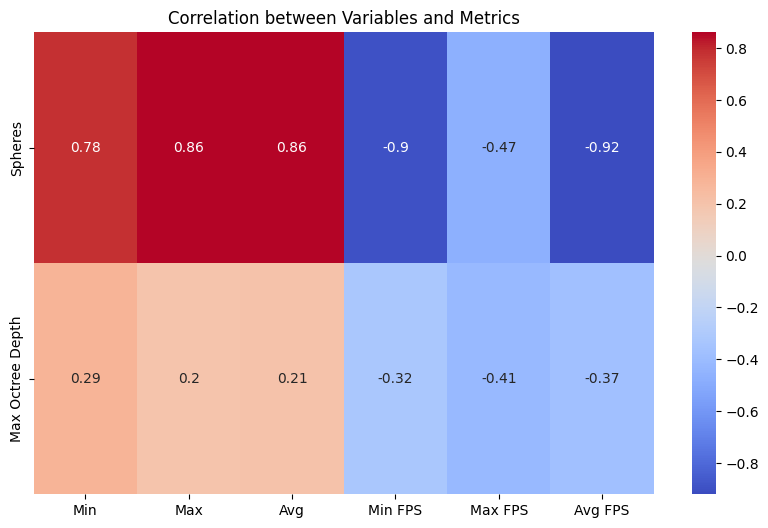

In [29]:
import seaborn as sns

# Calculate the correlation matrix between the 6 variables and the 6 metrics
variables = ['Spheres', 'Max Octree Depth']
metrics = ['Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']

correlation = df_octree[variables + metrics].corr().loc[variables, metrics]
print("Correlation between variables and metrics:")
print(correlation)

# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Metrics')
plt.show()

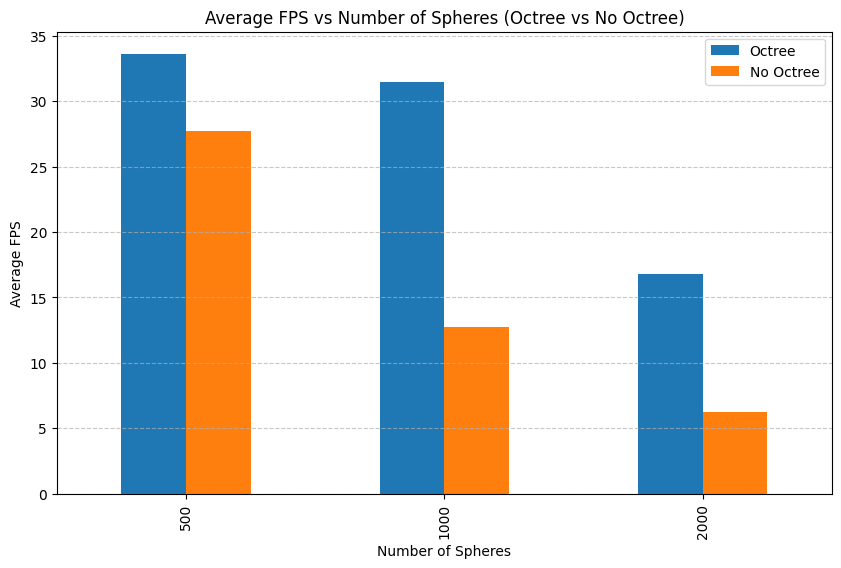

In [10]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Spheres')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

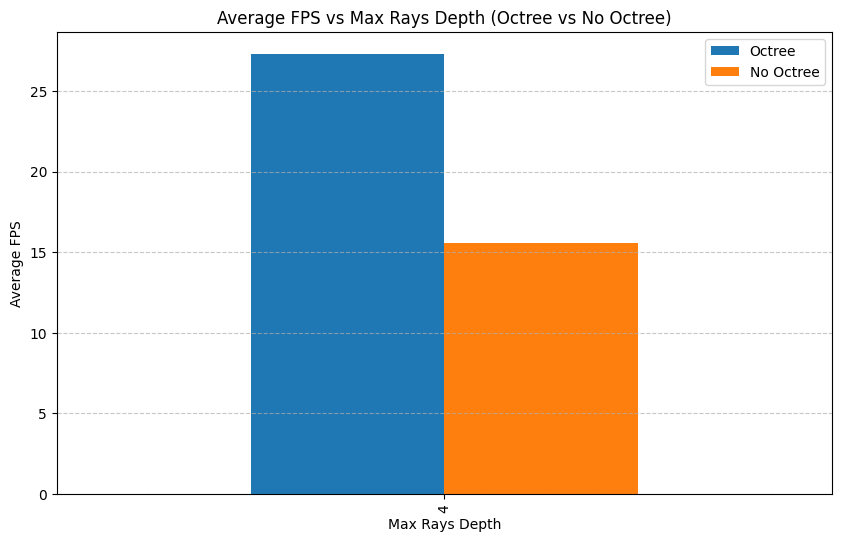

In [14]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Max Rays Depth')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Max Rays Depth')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Max Rays Depth')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Max Rays Depth (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

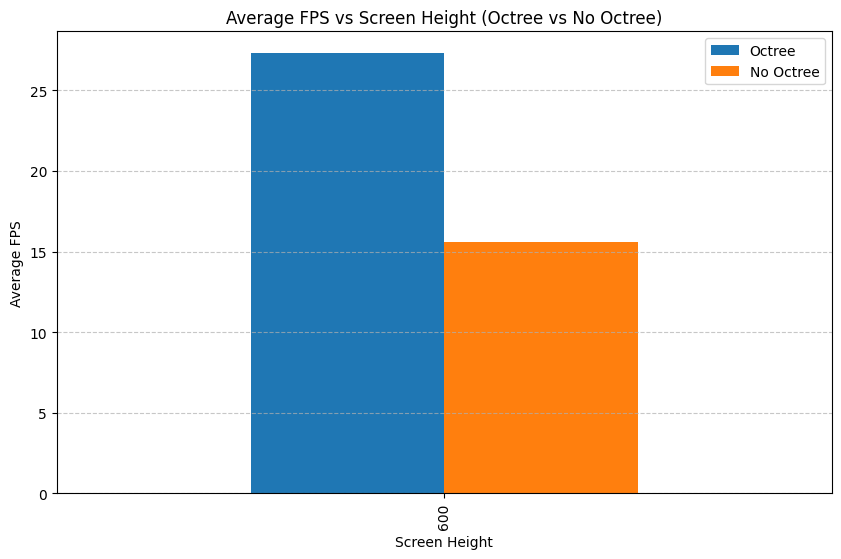

In [15]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Screen Height')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Screen Height')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Screen Height')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Screen Height (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

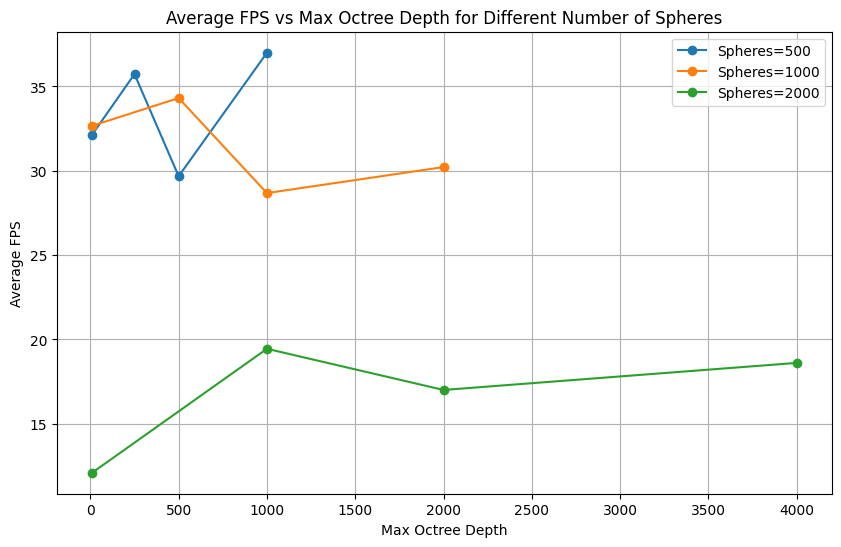

In [28]:
# Define your cases
cases = [
    {'spheres': 500, 'depths': [10, 250, 500, 1000]},
    {'spheres': 1000, 'depths': [10, 500, 1000, 2000]},
    {'spheres': 2000, 'depths': [10, 1000, 2000, 4000]},
]

plt.figure(figsize=(10, 6))

for case in cases:
    spheres = case['spheres']
    depths = case['depths']
    subset = df_octree[(df_octree['Spheres'] == spheres) & (df_octree['Max Octree Depth'].isin(depths))]
    # Sort by depth for correct line plotting
    subset = subset.sort_values('Max Octree Depth')
    plt.plot(subset['Max Octree Depth'], subset['Avg FPS'], marker='o', label=f'Spheres={spheres}')

plt.xlabel('Max Octree Depth')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Max Octree Depth for Different Number of Spheres')
plt.legend()
plt.grid(True)
plt.show()


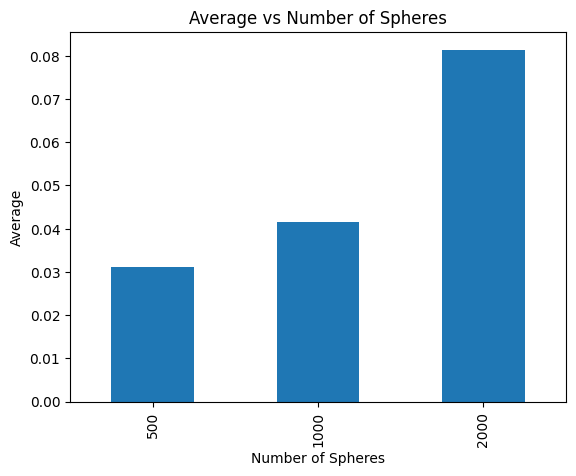

In [32]:
df.groupby('Spheres')['Avg'].mean().plot(kind='bar')
plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres')
plt.show()